### Part 2: Preprocessing
- overview of ML system:
    - have labels (y, correct answers to predictions), and attributes (X, used to make predictions)
    - before attributes are put into the model for training and testing, need to go through some transformations
- will talk about some of the model common transformations made

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [4]:
df = pd.read_csv("drawndata1.csv")

In [5]:
df.head()

,x,y,z
0,58.080365,225.699042,a
1,238.867357,247.456645,a
2,156.218212,286.588782,a
3,262.004361,284.251445,a
4,185.243183,308.187571,a


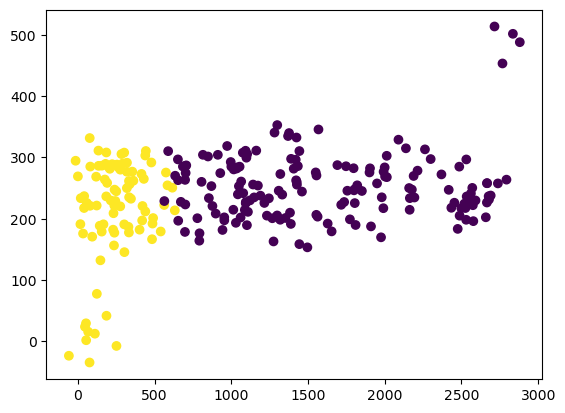

In [8]:
# goal: use x and y columns (float values) to predict z column (char values)
# first need to split into X and y
X = df[['x', 'y']].values
y = df['z'] == "a"

# plot the data and find that there is a group of yellow, group of black, and a group of yellow outliers, and a group of yellow outliers
plt.scatter(X[:, 0], X[:, 1], c=y);


#### Scaling
- y axis diff scale from x axis --> algos usually sensitive to this, to want to preprocess to get same scale
- most standard way to scale is to use StandardScaler
    - for each col, calculate mean & variance
    - for each data point x:
        - [x - mean(x)] / sqrt(variance)
    - will get scaled nums close to 0

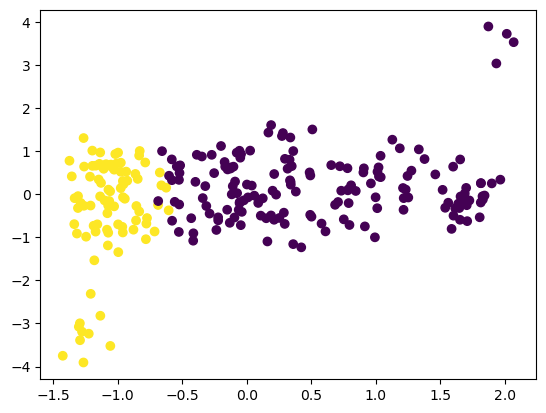

In [12]:
from sklearn.preprocessing import StandardScaler
# create new array of attributes that have been scaled 
X_scaled = StandardScaler().fit_transform(X)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y);


#### More Scaling: Dealing with Outliers
- after StandardScaler, axes much more similar, but not totally:
    - y: -4 --> 4, step = 1, spread = 8
    - x: -1.5 --> 2.0, step = 0.5, spread = 3.5
- also, outliers still there
- better way of scaling?

- instead of scaling around mean like StandardScaler does, try scaling around the quantiles (25th, 50th, 75th)
- e.g. for skewed-right data, there is a big bump on the left that declines as you move right
    - this means that 25th & 50th quantile squished closer, 75th a little farther, and 99th very far away
    - by scaling the quantiles, you extend the distance b/w 25th & 50th quantiles, and reduce the distance b/w 75th and 99th quantiles
 
- NOTE:
    - quartile = 1/4 of the data, split into 25th, 50th, and 75th
    - quantile = generic version of quartile, could be 10th, 30th, 99th, etc

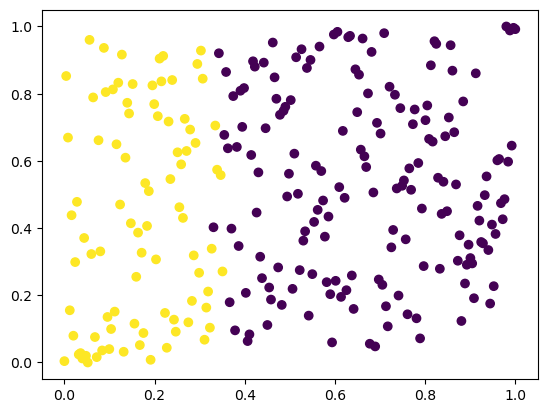

In [25]:
# transform data using quantiles
from sklearn.preprocessing import QuantileTransformer

# the default number of quantiles set = 1000, but we only have 252 data samples, so just set to amount of data samples
n_samples = 252
X_quant_tfm = QuantileTransformer(n_quantiles = n_samples).fit_transform(X)
plt.scatter(X_quant_tfm[:, 0], X_quant_tfm[:, 1], c=y);

# now min and max on x and y axis are the same!
# 0 --> 1.0, step = 0.2 for both
# outliers are still there, but not as big of an effect bc data is more spread out
# changing how you transform data has a big effect on predicted values!

### Preprocessing pt2
- now using a dataset that presents a classification task that is NOT linearly separable
- ie cannot draw a line where on one side you will have black points, and other side will have black points, like was possible with the previous dataset after transforming it using quantiles


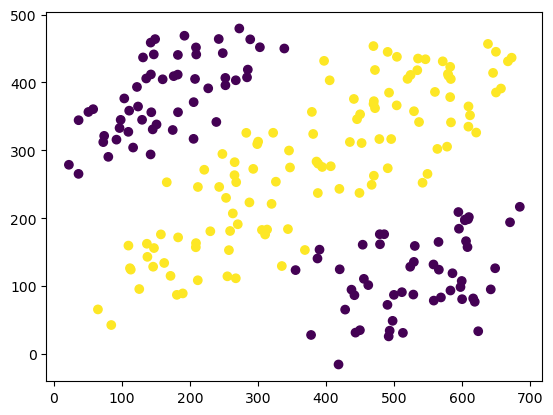

In [26]:
df = pd.read_csv("drawndata2.csv")
X = df[['x', 'y']].values
y = df['z'] == "a"

plt.scatter(X[:, 0], X[:, 1], c=y);

# shape of data might make you think logisitc regression won't work well, and need antoher algo
# need to test assumption
# logisitc regression = estimate probability of event happening given set of independent variables

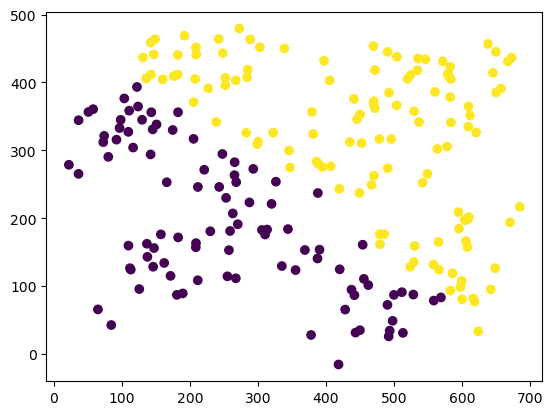

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# create pipeline with quantile transformer first for preprocessing, then apply a logistic regression model to the data
pipe = Pipeline([
    ("scale", QuantileTransformer(n_quantiles=100)),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);


#### Logistic Regression on non-linearly-separable classification task
- after logistic regression applied, can see that model has tried to create separation, but not well separated
- should be vertical line of separation
- BAD classifier!
- can we fix with pre processing?

- right now logistic regression can only use 2 columns, x1 and x2 to come up with line of separation (2 axes)
    - these are the linear features
- can use linear features to generate non-linear features
    - e.g. generate x1*x2, x1^2, x2^2 --> might help model create better separating line
    - need to change pipeline that add new features in

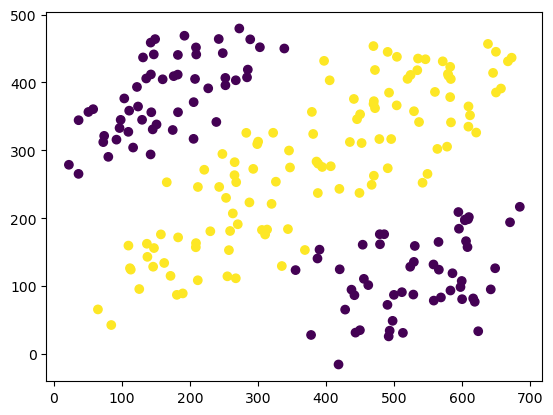

In [36]:
from sklearn.preprocessing import PolynomialFeatures

# change pipeline, instead of using quantile preprocessing, use polynomialFeatures to include the x1*x2, etc.
pipe = Pipeline([
    ("scale", PolynomialFeatures()),
    ("model", LogisticRegression())
])

pred = pipe.fit(X, y).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred);

# now have much better separating lines! why?